 ## step1.ipynb

This notebook implements parts of the first step in the 5/28/18 plan.  
The first part of the plan (e.g. implementation of `double_sigma` units with sharpen ports) was tested in ../tests/test10.ipynb .

By `Sergio Verduzco`  
June 2018

### First part
Recreate the simulation in the __test 4__ section of test10.ipynb, this time using the ei_network framework.

__Proceed here directly after reset.__

The `sharpen` port will be 2, and the `rdc` port will be 0, where e,i inputs will arrive. Inputs arrive at port 1. 
Inputs to the sharpen port are set manually (without ei_net methods).


In [ ]:
# import the ei_network class and draculab
%cd ..
from ei_network import *

In [ ]:
# create the network using the ei_network tools
layers = ['L', 'shrp']  # L is the layer, shrp is the extra input to the sharpen port
ei_net = ei_network(layers)

In [ ]:
# Configure layer parameters
L = ei_net.layers['L']
shrp = ei_net.layers['shrp']
#----------------------------------
L.set_param('e_pars', 'type', unit_types.sds_n_sharp)
L.set_param('e_pars', 'slope_min', 6.)
L.set_param('e_pars', 'slope_wid', .1)
L.set_param('e_pars', 'thresh_min', .3)
L.set_param('e_pars', 'thresh_wid', 0.1)
L.set_param('e_pars', 'n_ports', 4)
L.set_param('e_pars', 'branch_params', {'branch_w' : [0.5, 0.5], 'slopes' : 4, 'threshs' : 0.1})
L.set_param('e_pars', 'tau_slow', 10.)
L.set_param('e_pars', 'tau_fast', 0.05)
L.set_param('e_pars', 'c', 2.)
L.set_param('e_pars', 'tau_thr', .002)
L.set_param('e_pars', 'rdc_port', 1)
L.set_param('e_pars', 'thr_fix', 0.)
L.set_param('e_pars', 'tau_fix', 0.1)
L.set_param('e_pars', 'sharpen_port', 3)
#----------------------------------
L.annotate("Adjusting size of e,i groups.")
L.set_param('e_geom', 'rows', 8)
L.set_param('e_geom', 'columns', 8)
L.set_param('i_geom', 'rows', 4)
L.set_param('i_geom', 'columns', 4)
L.annotate("Compensating for the ratio of excitatory to inhibitory units.")
L.set_param('ee_conn', 'weights',{'uniform' : {'low': .01, 'high' : 0.3}})
L.set_param('ei_conn', 'weights',{'uniform' : {'low': .01, 'high' : 0.3}})
L.set_param('ie_conn', 'weights',{'uniform' : {'low': -1., 'high' : -.1}})
L.set_param('ii_conn', 'weights',{'uniform' : {'low': -1., 'high' : -0.01}})
#----------------------------------
L.annotate("Setting input parameters")
L.set_param('x_geom', 'rows', 5) 
L.set_param('x_geom', 'columns', 5) 
L.set_param('xe_conn', 'weights', {'uniform' : {'low': 0.05, 'high' : 4.}})
L.set_param('xi_conn', 'weights', {'uniform' : {'low': 0.05, 'high' : 4.}})
L.set_param('xe_conn', 'mask', {'circular': {'radius': .3}})
L.set_param('xi_conn', 'mask', {'circular': {'radius': .3}})
#-----------------------------------
# specifying input ports
L.set_param('ee_syn', 'inp_ports', 1) # ee should be at input 0 for trdc units
L.set_param('xe_syn', 'inp_ports', 2)
#L.set_param('xi_syn', 'inp_ports', 1)
L.set_param('ie_syn', 'inp_ports', 0)
#----------------------------------
L.annotate("Using Oja input synapses")
L.set_param('xe_syn', 'type', synapse_types.oja)
L.set_param('xe_syn', 'lrate', 1./100.)
L.set_param('xi_syn', 'type', synapse_types.oja)
L.set_param('xi_syn', 'lrate', 1./100.)
#----------------------------------
L.annotate("Using BCM EE synapses")
L.set_param('ee_syn', 'type', synapse_types.bcm)
L.set_param('ee_syn', 'lrate', 1./100.)
#L.set_param('ee_syn', 'omega', 2.)
#----------------------------------
L.annotate("Using corr_homeo_inhib IE synapses")
L.set_param('ie_syn', 'type', synapse_types.corr_inh)
L.set_param('ie_syn', 'lrate', 1./20.)
L.set_param('e_pars', 'des_act', 0.4)
#----------------------------------
L.annotate("Using anti_cov_pre EI synapses")
L.set_param('ei_syn', 'type', synapse_types.anticov_pre)
L.set_param('ei_syn', 'lrate', .02)
#----------------------------------
shrp.annotate("Leaving a single input unit in the layer")
shrp.set_param('e_geom', 'rows', 0)
shrp.set_param('i_geom', 'rows', 0)
shrp.set_param('x_geom', 'rows', 1)
shrp.set_param('x_geom', 'columns', 1)
#----------------------------------
shrp.annotate("Configuring sharpening unit")
shrp.set_param('x_pars', 'function', lambda x : None)
shrp.set_param('x_pars', 'init_val', 1.)
shrp.set_param('x_pars', 'coordinates', np.array([0.,0.]))
#----------------------------------
L.set_param('n', 'w_track', 16)
shrp.set_param('n', 'w_track', 0)
#----------------------------------

In [ ]:
# Add interlayer connections
ei_net.add_connection(('shrp','x'), ('L','e'))

In [ ]:
# Configure interlayer connections
ei_net.set_param('shrpx_Le_conn', 'mask',{'circular': {'radius': 10.}})
ei_net.set_param('shrpx_Le_conn', 'kernel', 1.)
ei_net.set_param('shrpx_Le_conn', 'weights', {'uniform' : {'low': 1., 'high': 1.}})
ei_net.set_param('shrpx_Le_syn', 'init_w', 1.)
ei_net.set_param('shrpx_Le_syn', 'inp_ports', L.e_pars['sharpen_port'])

In [ ]:
# Build the network
ei_net.build()

In [ ]:
# Creating input patterns
## The patterns of L.x
n_pat = 4  # number of input patterns
pat_arr = np.zeros((4, 25)) # ei_runner.n['x'])) # array with all input patterns

for row in range(5):
    for col in range(5):
        idx = 5*col + row
        if row == col or row+col == 4: # The X input pattern
            pat_arr[0,idx] = 1
        if row == 2 or col == 2:  # The + input pattern
            pat_arr[1,idx] = 1
        if row == 1 or row == 3:  # The = input pattern
            pat_arr[2,idx] = 1
        if col == 1 or col == 3:  # The || input pattern
            pat_arr[3,idx] = 1
pat_arr = pat_arr / 5.

def inp_pat(pres, rows, columns, port=0, random=False):
    # The function that creates the input pattern shown at each presentation in ei_net.run
    if random:
        idx = np.random.randint(4)
    else:
        idx = pres % 4
    return pat_arr[idx, :]

## The pattern of shrp.x is irrelevant, we set it using the set_inp_fun argument
shrp_inp_pat = lambda p, r, c : 1.


def make_shrp_fun(prev_pat, cur_pat, init_time, pres_time, inp_units):
    eps = .1 # distance to the input change where sharpening is released
    return lambda t : 0. if (t < init_time+eps or t > init_time+pres_time-eps) else 1.
    #return lambda t: 1.

def set_shrp_fun(pre_inp, cur_inp, init_time, pres_time, inp_units):
    for unit in inp_units:
            unit.set_function( make_shrp_fun(pre_inp, cur_inp, init_time, pres_time, inp_units) )

inp_pat_dic = {'L' : inp_pat, 'shrp' : shrp_inp_pat}
inp_fun_dic = {'shrp' : set_shrp_fun }

In [ ]:
# Simulating
n_pres = 8
pres_time = 2.
    
ei_net.run(n_pres, pres_time, set_inp_pat=inp_pat_dic, set_inp_fun=inp_fun_dic)

In [ ]:
%matplotlib inline
ei_net.basic_plot('L')

In [ ]:
%matplotlib inline
ei_net.basic_plot('shrp')

In [ ]:
ei_net.double_anim(L.e, slider=False, interv=20, nbins=20, thr=0.5, pdf=True)

In [ ]:
# Plot the highest excitatory unit activities
%matplotlib inline
n_top = 5  # how many units to plot
top_pop = np.array(L.e)  # population to visualize
top_units = ei_net.all_activs[top_pop].sum(1).argpartition(-n_top)[-n_top:]
print(top_units)
top_act_fig = plt.figure(figsize=(18,8))
top_acts = ei_net.all_activs[top_pop[top_units]].transpose()
plt.plot(ei_net.all_times, top_acts)
plt.show()

In [ ]:
# Plot the lowest excitatory unit activities
n_bottom = 10  # how many units to plot
bottom_pop = np.array(L.e)  # population to visualize
bottom_units = ei_net.all_activs[bottom_pop].sum(1).argpartition(n_bottom)[0:n_bottom-1]
print(bottom_units)
bottom_act_fig = plt.figure(figsize=(18,8))
bottom_acts = ei_net.all_activs[bottom_pop[bottom_units]].transpose()
plt.plot(ei_net.all_times, bottom_acts)
plt.show()

In [ ]:
ei_net.hist_anim(L.e)

### Second part
Represent combinations of 2 localized 1D layers using the middle layer. 

Test representations using the angle of the activity vectors. At the end of the presentation, when the layer activity has settled, you take the activity vector of the middle layer.
* Activity vectors with the same input pattern should have small angles, and the std. dev. of the angles around the mean should be small.
* Activity vectors from different inputs should have larger angles, e.g. their normalized inner products should be small.

__Proceed here directly after reset.__



In [1]:
# import the ei_network class and draculab
%cd ..
from ei_network import *

/Users/sergio/projects/draculab


In [ ]:
# This is the name of the file where logging will happen
log_file = "./logs/step1p2" + time.strftime("_%m-%d-%y.txt")

In [ ]:
%%capture capt 
# logging draculab version used for this session
print('#======================================================')
print('#             | Latest git commit: |')
print('#====================================================== \n#', end=' ')
!git log -1 --oneline --color=never

In [ ]:
# Write the output of the cell above in the simulation log
f = open(log_file, mode='a')
f.write(capt.stdout)
f.close()

In [2]:
# create the network using the ei_network tools
layers = ['L', 'shrp','I1', 'I2']  # L is the layer, shrp is the extra input to the sharpen port, I1,2 are the input layers
ei_net = ei_network(layers)

In [3]:
# Configure layer parameters

ei_net.annotate('Configuration for sig_ssrdc units in L.e')
L = ei_net.layers['L']
shrp = ei_net.layers['shrp']
I1 = ei_net.layers['I1']
I2 = ei_net.layers['I2']

#----------------------------------
L.annotate("Configuration of units in layer L.")
L.set_param('e_pars', 'type', unit_types.sig_ssrdc)
L.set_param('e_pars', 'slope_min', 1.7)
L.set_param('e_pars', 'slope_wid', .5)
L.set_param('e_pars', 'thresh_min', .0)
L.set_param('e_pars', 'thresh_wid', 0.4)
L.set_param('e_pars', 'n_ports', 2)
L.set_param('e_pars', 'branch_params', {'branch_w' : [0.1, 0.45, 0.45], 'slopes' : 4, 'threshs' : 0.2})
L.set_param('e_pars', 'tau_slow', 10.)
L.set_param('e_pars', 'tau_fast', 0.05)
L.set_param('e_pars', 'c', 3.)
L.set_param('e_pars', 'tau_scale', .002)
L.set_param('e_pars', 'Kp', .02)
L.set_param('e_pars', 'tau_thr', .05)
L.set_param('e_pars', 'rdc_port', 0)
L.set_param('e_pars', 'hr_port', 0)
L.set_param('e_pars', 'thr_fix', 0.)
L.set_param('e_pars', 'tau_fix', 0.1)
L.set_param('e_pars', 'sharpen_port', 1)
#----------------------------------
L.annotate("Adjusting size of e,i groups.")
L.set_param('e_geom', 'rows', 10)
L.set_param('e_geom', 'columns', 10)
L.set_param('i_geom', 'rows', 5)
L.set_param('i_geom', 'columns', 5)
L.set_param('e_geom', 'jitter', 0.)
L.set_param('i_geom', 'jitter', 0.)
L.annotate("Compensating for the ratio of excitatory to inhibitory units.")
L.set_param('ee_conn', 'weights',{'uniform' : {'low': .01, 'high' : 0.3}})
L.set_param('ei_conn', 'weights',{'uniform' : {'low': .01, 'high' : 0.3}})
L.set_param('ie_conn', 'weights',{'uniform' : {'low': -1.2, 'high' : -.2}})
L.set_param('ii_conn', 'weights',{'uniform' : {'low': -1., 'high' : -0.01}})

#----------------------------------
L.annotate("Setting input parameters")
L.set_param('x_geom', 'rows', 0) # no input units in layer L
#-----------------------------------
# specifying local input ports
L.set_param('ee_syn', 'inp_ports', 0)
L.set_param('ie_syn', 'inp_ports', 0)
#----------------------------------
L.annotate("Using Oja input synapses")
L.set_param('xe_syn', 'type', synapse_types.oja)
L.set_param('xe_syn', 'lrate', 1./100.)
L.set_param('xi_syn', 'type', synapse_types.oja)
L.set_param('xi_syn', 'lrate', 1./100.)
#----------------------------------
L.annotate("Using sq_hebbsnorm EE synapses")
L.set_param('ee_syn', 'type', synapse_types.sq_hebbsnorm)
L.set_param('ee_syn', 'lrate', 1./100.)
L.set_param('ee_syn', 'omega', 2.)
#----------------------------------
L.annotate("Using corr_homeo_inhib IE synapses")
L.set_param('ie_syn', 'type', synapse_types.corr_inh)
L.set_param('ie_syn', 'lrate', 1./20.)
L.set_param('e_pars', 'des_act', 0.2)
#----------------------------------
L.annotate("Using anti_cov_pre EI synapses")
L.set_param('ei_syn', 'type', synapse_types.anticov_pre)
L.set_param('ei_syn', 'lrate', .02)
#----------------------------------
shrp.annotate("Leaving a single input unit in the layer")
shrp.set_param('e_geom', 'rows', 0)
shrp.set_param('i_geom', 'rows', 0)
shrp.set_param('x_geom', 'rows', 1)
shrp.set_param('x_geom', 'columns', 1)
#----------------------------------
shrp.annotate("Configuring sharpening unit")
shrp.set_param('x_pars', 'function', lambda x : None)
shrp.set_param('x_pars', 'init_val', 1.)
shrp.set_param('x_pars', 'coordinates', np.array([0.,0.]))
#----------------------------------
I1.annotate("Configuration of I1 geometry")
I1.set_param('e_geom', 'rows', 0)
I1.set_param('i_geom', 'rows', 0)
I1.set_param('x_geom', 'rows', 8)
I1.set_param('x_geom', 'columns', 1)
I1.set_param('x_geom', 'extent', [.5, 1.])
I1.set_param('x_geom', 'center', [-.7, 0.])
#----------------------------------
I2.annotate("Configuration of I2 geometry")
I2.set_param('e_geom', 'rows', 0)
I2.set_param('i_geom', 'rows', 0)
I2.set_param('x_geom', 'rows', 1)
I2.set_param('x_geom', 'columns', 8)
I2.set_param('x_geom', 'extent', [1., .5])
I2.set_param('x_geom', 'center', [0., .7])
#----------------------------------
L.set_param('n', 'w_track', 16)
shrp.set_param('n', 'w_track', 0)
I1.set_param('n', 'w_track', 0)
I2.set_param('n', 'w_track', 0)
#----------------------------------

In [4]:
# Add interlayer connections
ei_net.add_connection(('shrp','x'), ('L','e'))
ei_net.add_connection(('I1','x'), ('L','e'))
ei_net.add_connection(('I1','x'), ('L','i'))
ei_net.add_connection(('I2','x'), ('L','e'))
ei_net.add_connection(('I2','x'), ('L','i'))

In [5]:
# Configure interlayer connections
ei_net.set_param('shrpx_Le_conn', 'mask',{'circular': {'radius': 10.}})
ei_net.set_param('shrpx_Le_conn', 'kernel', 1.)
ei_net.set_param('shrpx_Le_conn', 'weights', {'uniform' : {'low': 0., 'high': 0.}})
ei_net.set_param('shrpx_Le_syn', 'init_w', 0.)
ei_net.set_param('shrpx_Le_syn', 'inp_ports', L.e_pars['sharpen_port'])

ei_net.set_param('I1x_Le_conn', 'mask', {'circular': {'radius': 5.}})
ei_net.set_param('I1x_Le_conn', 'kernel', 1.)
ei_net.set_param('I1x_Le_conn', 'weights', {'gaussian' : {'w_center': 1., 'sigma': .1}})
ei_net.set_param('I1x_Le_conn', 'dist_dim', 'y')
ei_net.set_param('I1x_Le_conn', 'edge_wrap', False)
ei_net.set_param('I1x_Le_syn', 'inp_ports', 1)

ei_net.set_param('I1x_Li_conn', 'mask', {'circular': {'radius': 5.}})
ei_net.set_param('I1x_Li_conn', 'kernel', 1.)
ei_net.set_param('I1x_Li_conn', 'weights', {'gaussian' : {'w_center': .3, 'sigma': 2.}})
ei_net.set_param('I1x_Li_conn', 'dist_dim', 'y')
ei_net.set_param('I1x_Li_conn', 'edge_wrap', False)

ei_net.set_param('I2x_Le_conn', 'mask', {'circular': {'radius': 5.}})
ei_net.set_param('I2x_Le_conn', 'kernel', 1.)
ei_net.set_param('I2x_Le_conn', 'weights', {'gaussian' : {'w_center': 1., 'sigma': .1}})
ei_net.set_param('I2x_Le_conn', 'edge_wrap', False)
ei_net.set_param('I2x_Le_conn', 'dist_dim', 'x')
ei_net.set_param('I2x_Le_syn', 'inp_ports', 1)

ei_net.set_param('I2x_Li_conn', 'mask', {'circular': {'radius': 5.}})
ei_net.set_param('I2x_Li_conn', 'kernel', 1.)
ei_net.set_param('I2x_Li_conn', 'weights', {'gaussian' : {'w_center': .3, 'sigma': 2.}})
ei_net.set_param('I2x_Li_conn', 'dist_dim', 'x')
ei_net.set_param('I2x_Li_conn', 'edge_wrap', False)


In [6]:
# Build the network
ei_net.build()

Building layer L
Building layer shrp
Building layer I1
Building layer I2


Creating shrpx_Le connection
Creating I1x_Le connection


/Users/sergio/projects/draculab/topology.py:286: UserWarning: topo_connect received an empty list as an argument
  warn('topo_connect received an empty list as an argument', UserWarning)


Creating I1x_Li connection
Creating I2x_Le connection
Creating I2x_Li connection


In [ ]:
# Visualize the connections
#ei_net.conn_anim(I1.x+I2.x, L.e, slider=False)
ei_net.conn_anim(L.e, L.e, slider=True)

In [7]:
#================ INPUT CONFIGURATION =================
n_pat1 = I1.n['x']  # number of input patterns for I1 is number of input units
n_pat2 = I2.n['x']  # number of input patterns for I2 is number of input units
pats1 = [] # here we'll store id's for the patterns presented by inp_pat1
pats2 = [] # here we'll store id's for the patterns presented by inp_pat2

def inp_pat1(pres, rows, columns, port=0, random=True):
    # The function that creates the input pattern for I1
    if random:
        idx = np.random.randint(n_pat1)
    else:
        idx = pres % n_pat1
    pats1.append(idx)
    return [0.5*(1. + np.cos(2.*np.pi*(x - idx)/n_pat1)) for x in range(n_pat1)]
    
def inp_pat2(pres, rows, columns, port=0, random=True):
    # The function that creates the input pattern for I2
    if random:
        idx = np.random.randint(n_pat2)
    else:
        idx = pres % n_pat2
    pats2.append(idx)
    return [0.5*(1. + np.cos(2.*np.pi*(x - idx)/n_pat2)) for x in range(n_pat2)]
    
## The pattern of shrp.x is irrelevant, we set it using the set_inp_fun argument
shrp_inp_pat = lambda p, r, c : 1.

def make_shrp_fun(prev_pat, cur_pat, init_time, pres_time, inp_units):
    eps = .1 # distance to the input change where sharpening is released
    return lambda t : 0. if (t < init_time+eps or t > init_time+pres_time-eps) else 1.
    #return lambda t: 1.

def set_shrp_fun(pre_inp, cur_inp, init_time, pres_time, inp_units):
    for unit in inp_units:
            unit.set_function( make_shrp_fun(pre_inp, cur_inp, init_time, pres_time, inp_units) )

inp_pat_dic = {'I1' : inp_pat1, 'I2' : inp_pat2, 'shrp' : shrp_inp_pat}
inp_fun_dic = {'shrp' : set_shrp_fun }
#======================================================


In [ ]:
%%capture capt2
# The cell above does input configuration, and this should capture it in 'capt2'
%history -l 1

In [ ]:
# Write the input configuration two cells above in the simulation log
f = open(log_file, mode='a')
f.write(capt2.stdout)
f.close()

In [12]:
# Simulating
n_pres = 10
pres_time = 1.
    
ei_net.run(n_pres, pres_time, set_inp_pat=inp_pat_dic, set_inp_fun=inp_fun_dic)

Starting presentation 6
Presentation 6 took 44.243823766708374 seconds 
Starting presentation 7
Presentation 7 took 46.78256893157959 seconds 
Starting presentation 8
Presentation 8 took 45.641091108322144 seconds 
Starting presentation 9
Presentation 9 took 46.14702582359314 seconds 
Starting presentation 10
Presentation 10 took 46.95960283279419 seconds 
Starting presentation 11
Presentation 11 took 46.69514298439026 seconds 
Starting presentation 12
Presentation 12 took 47.98590898513794 seconds 
Starting presentation 13
Presentation 13 took 45.82010889053345 seconds 
Starting presentation 14
Presentation 14 took 50.29478597640991 seconds 
Starting presentation 15
Presentation 15 took 46.482508182525635 seconds 
Total execution time is 467.06011509895325 seconds 
----------------------


In [ ]:
# Simulation analysis

## For each input presentation obtain the activity vector from layer L
ppat = int(round(pres_time/ei_net.net_params['min_delay'])) # number of data points per input pattern
pt = int(round((pres_time-0.2)/ei_net.net_params['min_delay'])) # data point where the vector will come from
e_pats = np.zeros((len(L.e), n_pres))  # array where we'll store the activity vectors
for pres in range(n_pres):
    for e_idx, idx in enumerate(L.e):
        e_pats[e_idx, pres] = ei_net.all_activs[idx, pres*ppat + pt]

# The ID of the input comes from the id's in pats1 and pats2, placed by inp_pat1 and inp_pat2 respectively.
pater1 = pats1[1:] # The first call is just for setting initial conditions; we discard its pattern
pater2 = pats2[1:] # ditto
pats = np.zeros(n_pat1*n_pat2)  # pats[n] is the number of times the pattern with ID 'n' appeared
n_pats = len(pats)
pres_pat = np.zeros(n_pres)  # pres_pat[n] is the ID of the pattern in presentation 'n'
for p in range(n_pres):
    p_id = n_pat2*pater1[p] + pater2[p] # the pattern ID 'flattens' all possible pairs of values
    pats[p_id] += 1
    pres_pat[p] = p_id
    
# plot the array of activity patterns
#%matplotlib inline
#ex_fig = plt.figure(figsize=(20,20))
#plt.imshow(e_pats)

# get the mean of output patterns corresponding to the same inputs
mean_out = np.zeros((len(L.e),n_pats)) # mean_out[:,n] = mean output for input n
for pres in range(n_pres):
    mean_out[:,int(pres_pat[pres])] += e_pats[:,pres]
    
for pat in range(n_pats):
    if pats[pat] > 1:
        mean_out[:, pat] = mean_out[:, pat]/ pats[pat]
        
# Obtain the angles between any two pairs of input patterns
# get all input patterns
all_inps = np.zeros((n_pats, n_pat1+n_pat2)) # all_inps[n,:] = input pattern with ID 'n'
for p1 in range(n_pat1):
    for p2 in range(n_pat2):
        all_inps[p1*n_pat2+p2, :n_pat1] = inp_pat1(p1, 1, 1, random=False)
        all_inps[p1*n_pat2+p2, n_pat1:] = inp_pat2(p2, 1, 1, random=False)
        

# get matrices with dot products between pairs of patterns
inp_norm = np.linalg.norm(all_inps[0,:])   # all input vectors have the same norm
inp_norm2 = inp_norm*inp_norm
inp_dots = np.zeros((n_pats, n_pats))
out_dots = np.zeros((n_pats, n_pats))
for p1 in range(n_pats):
    for p2 in range(n_pats):
        inp_dots[p1,p2] = np.dot(all_inps[p1,:], all_inps[p2,:])/inp_norm2
        if pats[p1] > 0 and pats[p2] > 0: # if the two input patterns were presented
                #pres_idx1 = np.argmin(abs(pres_pat - p1))  # index of presentation where you showed pattern 1
                #pres_idx2 = np.argmin(abs(pres_pat - p2))  # index of presentation where you showed pattern 2
                #vec1 = e_pats[:,pres_idx1]  # first input vector
                #vec2 = e_pats[:,pres_idx2]  # second input vector
                vec1 = mean_out[:,p1]
                vec2 = mean_out[:,p2]
                norm1 = np.linalg.norm(vec1)
                norm2 = np.linalg.norm(vec2)
                out_dots[p1,p2] = np.dot(vec1,vec2)/(norm1*norm2)

                
# compare the angles between input patterns with the angles between output patterns
absissae = []
ordinates = []
for row in range(n_pats):
    for column in range(n_pats):
        if out_dots[row,column] > 0:
            absissae.append(inp_dots[row,column])
            ordinates.append(out_dots[row,column])
            
#plot the results of the analysis
%matplotlib inline
fig, axes = plt.subplots(2,2, figsize=(21, 23))
fig.subplots_adjust(hspace=0.2, wspace=0.1)

im0 = axes[0,0].plot(absissae, ordinates, '.')
axes[0,0].set_title('inp_dots vs out_dots')
im1 = axes[0,1].imshow(mean_out)
axes[0,1].set_title('mean output for each input pattern')
fig.colorbar(im1,ax=axes[0,1],fraction=0.1,shrink=0.8)
im2 = axes[1,0].imshow(inp_dots)
axes[1,0].set_title('dot products between input vectors')
im3 = axes[1,1].imshow(out_dots)
axes[1,1].set_title('dot products between mean output vectors')
#fig.colorbar(im3,fraction=0.1,shrink=0.8)

    
# A numerical measure of how much the output representation differentiates the inputs may be the norm of (inp_dots - out_dots)
diff_norm = np.linalg.norm(inp_dots-out_dots) # will use Frobenius norm, as if they were vectors
print("norm of output matrix: %f" % (np.linalg.norm(out_dots)))
print("norm of input matrix: %f" % (np.linalg.norm(inp_dots)))
print("norm of difference between matrices: %f" % (diff_norm))

In [ ]:
%%capture capt3
# The cell above does output analysis, and this can capture it in 'capt3'
%history -l 1

In [ ]:
# Write the analysis code two cells above in the simulation log
f = open(log_file, mode='a')
f.write(capt3.stdout)
f.close()

In [ ]:
# plot the array of activity patterns, or difference matrix
%matplotlib inline
ex_fig = plt.figure(figsize=(20,20))
#plt.imshow(e_pats[:,:100])
plt.imshow(inp_dots-out_dots)
plt.colorbar()

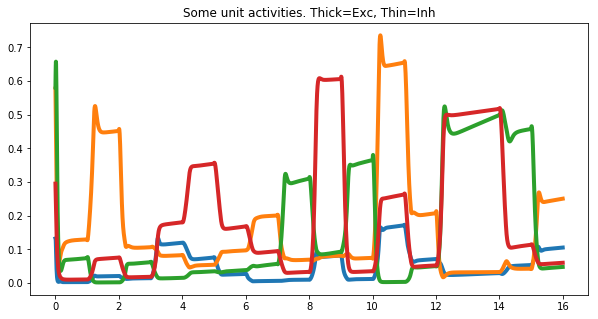

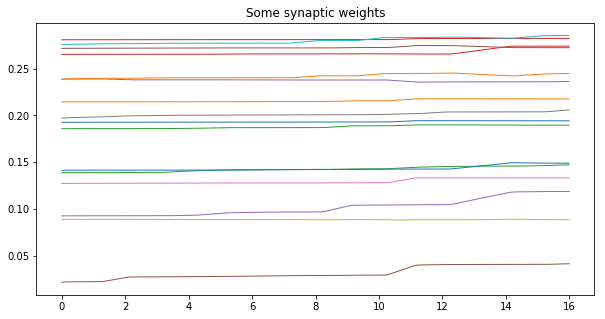

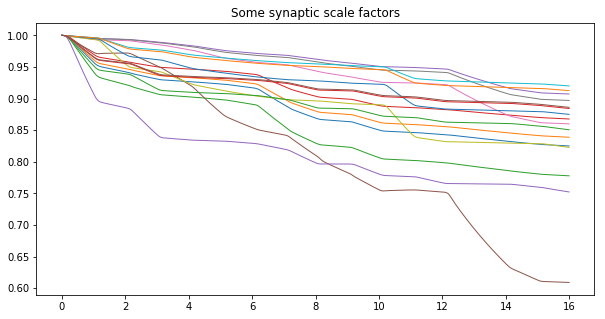

In [15]:
%matplotlib inline
ei_net.basic_plot('L')

In [ ]:
%matplotlib inline
ei_net.basic_plot('shrp')

In [14]:
ei_net.double_anim(L.e, slider=False, interv=20, nbins=20, thr=0.7, pdf=True)

In [ ]:
# Plot the highest excitatory unit activities
%matplotlib inline
n_top = 2  # how many units to plot
top_pop = np.array(L.e)  # population to visualize
top_units = ei_net.all_activs[top_pop].sum(1).argpartition(-n_top)[-n_top:]
print(top_units)
top_act_fig = plt.figure(figsize=(18,8))
top_acts = ei_net.all_activs[top_pop[top_units]].transpose()
plt.plot(ei_net.all_times, top_acts)
plt.show()

In [ ]:
# Plot the lowest excitatory unit activities
n_bottom = 10  # how many units to plot
bottom_pop = np.array(L.e)  # population to visualize
bottom_units = ei_net.all_activs[bottom_pop].sum(1).argpartition(n_bottom)[0:n_bottom-1]
print(bottom_units)
bottom_act_fig = plt.figure(figsize=(18,8))
bottom_acts = ei_net.all_activs[bottom_pop[bottom_units]].transpose()
plt.plot(ei_net.all_times, bottom_acts)
plt.show()

In [ ]:
# Annotations and log
ei_net.annotate("This run shows that the ss_hr_sig units are very promising as a way to create ", make_history=False)
ei_net.annotate("a good input representation, even if the rate distribution is not exponential.  ", make_history=False)
#ei_net.annotate("This is the first time the analysis of the output is done, and to ensure that. ", make_history=False)
#ei_net.annotate("all possible input pattern were presented, and the network was not changing anymore, ", make_history=False)
#ei_net.annotate("the simulation consisted of 1000 pattern presentations, taking roughly 15000 seconds in breaker. ", make_history=False)
#ei_net.annotate("The analysis shows excellent representation. Also, those Oja synapses never did", make_history=False)
#ei_net.annotate("stop growing.", make_history=False)
ei_net.log(name=log_file,params=True)

In [ ]:
ei_net.save('step1p2_sds_n_sharp_crcr.pkl')